<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Boggle_Board_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boggle Board

You're given a two-dimensional array (a matrix) of potentially unequal height and width containing letters; this matrix represents a boggle board. You're also given a list of words.

Write a function that returns an array of all the words contained in the boggle board. The final words don't need to be in any particular order.

A word is constructed in the boggle board by connecting adjacent (horizontally, vertically, or diagonally) letters, without using any single letter at a given position more than once; while a word can of course have repeated letters, those repeated letters must come from different positions in the boggle board in order for the word to be contained in the board. Note that two or more words are allowed to overlap and use the same letters in the boggle board.

Sample Input

```
board = [
  ["t", "h", "i", "s", "i", "s", "a"],
  ["s", "i", "m", "p", "l", "e", "x"],
  ["b", "x", "x", "x", "x", "e", "b"],
  ["x", "o", "g", "g", "l", "x", "o"],
  ["x", "x", "x", "D", "T", "r", "a"],
  ["R", "E", "P", "E", "A", "d", "x"],
  ["x", "x", "x", "x", "x", "x", "x"],
  ["N", "O", "T", "R", "E", "-", "P"],
  ["x", "x", "D", "E", "T", "A", "E"],
],
words = [
  "this", "is", "not", "a", "simple", "boggle",
  "board", "test", "REPEATED", "NOTRE-PEATED",
]
```



Sample Output

```
["this", "is", "a", "simple", "boggle", "board", "NOTRE-PEATED"]
// The words could be ordered differently.
```



# Soltuion 1

In [ ]:
# Time O(nm*8^2 + ws)
# Space O(nm + ws)
# w : # of word in words list
# s : max len(word)
# n : board width
# m : board height

def boggleBoard(board, words):
  trie = Trie()
  # O(ws) T
  for word in words:
    trie.add(word)
  found_words = set()
  visited = [[False for letter in row] for row in board]
  for row in range(len(board)): # O(m) T
    for col in range(len(board[0])): # O(N) T
      # O(8^s) T
      dfs_explore(row, col, board, trie.root, visited, found_words)
  return list(found_words)

def dfs_explore(row, col, board, trie_node, visited, found_words):
  if visited[row][col]:
    return
  letter = board[row][col]
  if letter not in trie_node:
    return
  visited[row][col] = True
  trie_node = trie_node[letter]
  if "*" in trie_node:
    found_words.add(trie_node['*'])
  neighbors = get_neighbors(row, col, board)
  for neighbor in neighbors:
    dfs_explore(neighbor[0], neighbor[1], board, trie_node, visited, found_words)
  visited[row][col] = False

def get_neighbors(row, col, board):
  neighbors = []
  if row > 0 and col > 0:
    neighbors.append([row - 1, col - 1])
  if row > 0:
    neighbors.append([row - 1, col])
  if row > 0 and col < len(board[0]) - 1:
    neighbors.append([row - 1, col + 1])
  if col > 0:
    neighbors.append([row, col - 1])
  if col < len(board[0]) - 1:
    neighbors.append([row, col + 1])
  if row < len(board) - 1 and col > 0:
    neighbors.append([row + 1, col - 1])
  if row < len(board) - 1:
    neighbors.append([row + 1, col])
  if row < len(board) - 1 and col < len(board[0]) - 1:
    neighbors.append([row + 1, col + 1])
  return neighbors
    
class Trie:
  def __init__(self):
    self.root = {}
    self.endSymbol = '*'

  def add(self, word):
    current = self.root
    for letter in word:
      if letter not in current:
        current[letter] = {}
      current = current[letter]
    current[self.endSymbol] = word


In [ ]:
board = [
  ["t", "h", "i", "s", "i", "s", "a"],
  ["s", "i", "m", "p", "l", "e", "x"],
  ["b", "x", "x", "x", "x", "e", "b"],
  ["x", "o", "g", "g", "l", "x", "o"],
  ["x", "x", "x", "D", "T", "r", "a"],
  ["R", "E", "P", "E", "A", "d", "x"],
  ["x", "x", "x", "x", "x", "x", "x"],
  ["N", "O", "T", "R", "E", "-", "P"],
  ["x", "x", "D", "E", "T", "A", "E"],
]

words = [
  "this", "is", "not", "a", "simple", "boggle",
  "board", "test", "REPEATED", "NOTRE-PEATED",
]
boggleBoard(board, words)

['is', 'simple', 'a', 'board', 'NOTRE-PEATED', 'this', 'boggle']

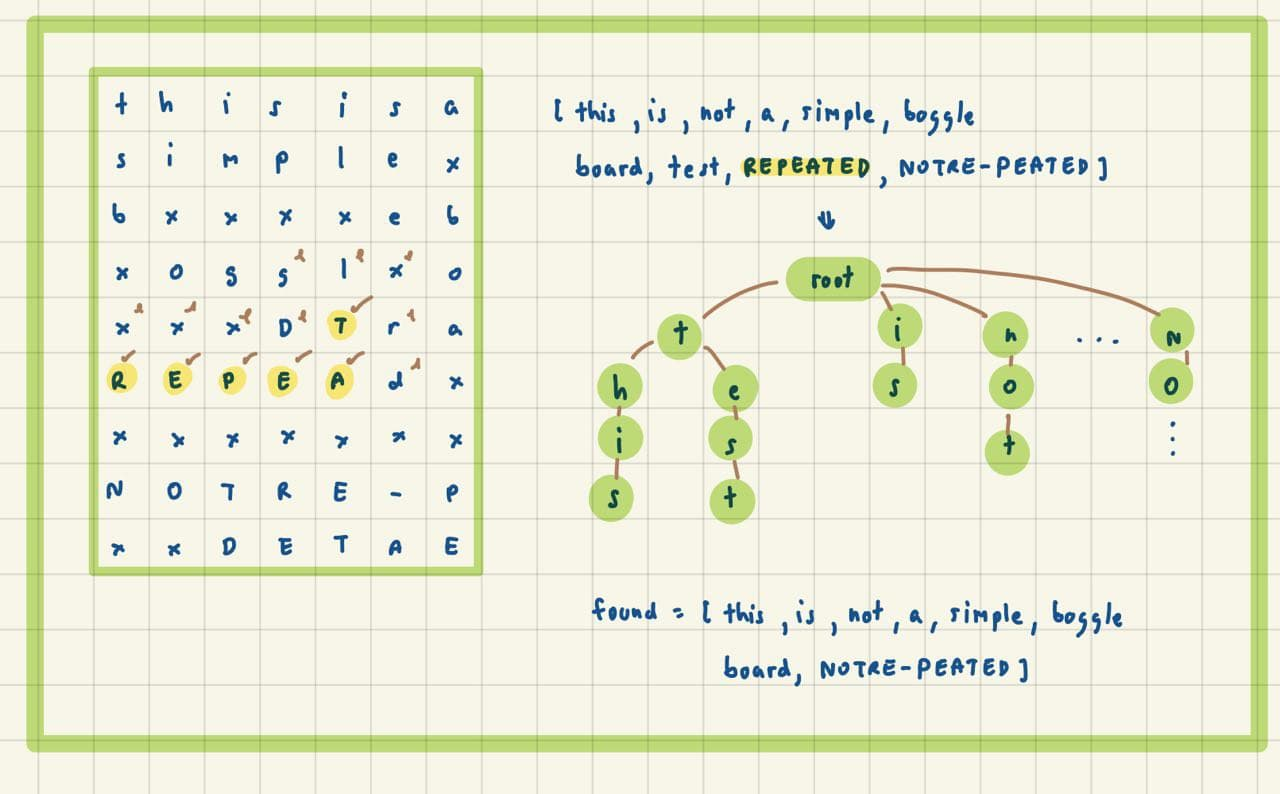

# Solution 2

- same as solution 1 but change visited array to hash table

In [ ]:
# Time O(nm*8^2 + ws)
# Space O(ws)
# slighly better space complexity than solution 1 (space of solution 1 = O(nm + ws))
# w : # of word in words list
# s : max len(word)
# n : board width
# m : board height

def boggleBoard(board, words):
  trie = Trie()
  # O(ws) T
  for word in words:
    trie.add(word)
  found_words = set()

  # change visited array to hash table
  visited = set()
  for row in range(len(board)): # O(m) T
    for col in range(len(board[0])): # O(N) T
      # O(8^s) T
      dfs_explore(row, col, board, trie.root, visited, found_words)
  return list(found_words)

def dfs_explore(row, col, board, trie_node, visited, found_words):
  if (row, col) in visited:
    return
  letter = board[row][col]
  if letter not in trie_node:
    return
  visited.add((row, col))
  trie_node = trie_node[letter]
  if "*" in trie_node:
    found_words.add(trie_node['*'])
  neighbors = get_neighbors(row, col, board)
  for neighbor in neighbors:
    dfs_explore(neighbor[0], neighbor[1], board, trie_node, visited, found_words)
  visited.remove((row, col))

def get_neighbors(row, col, board):
  neighbors = []
  if row > 0 and col > 0:
    neighbors.append([row - 1, col - 1])
  if row > 0:
    neighbors.append([row - 1, col])
  if row > 0 and col < len(board[0]) - 1:
    neighbors.append([row - 1, col + 1])
  if col > 0:
    neighbors.append([row, col - 1])
  if col < len(board[0]) - 1:
    neighbors.append([row, col + 1])
  if row < len(board) - 1 and col > 0:
    neighbors.append([row + 1, col - 1])
  if row < len(board) - 1:
    neighbors.append([row + 1, col])
  if row < len(board) - 1 and col < len(board[0]) - 1:
    neighbors.append([row + 1, col + 1])
  return neighbors
    
class Trie:
  def __init__(self):
    self.root = {}
    self.endSymbol = '*'

  def add(self, word):
    current = self.root
    for letter in word:
      if letter not in current:
        current[letter] = {}
      current = current[letter]
    current[self.endSymbol] = word


In [ ]:
board = [
  ["t", "h", "i", "s", "i", "s", "a"],
  ["s", "i", "m", "p", "l", "e", "x"],
  ["b", "x", "x", "x", "x", "e", "b"],
  ["x", "o", "g", "g", "l", "x", "o"],
  ["x", "x", "x", "D", "T", "r", "a"],
  ["R", "E", "P", "E", "A", "d", "x"],
  ["x", "x", "x", "x", "x", "x", "x"],
  ["N", "O", "T", "R", "E", "-", "P"],
  ["x", "x", "D", "E", "T", "A", "E"],
]

words = [
  "this", "is", "not", "a", "simple", "boggle",
  "board", "test", "REPEATED", "NOTRE-PEATED",
]
boggleBoard(board, words)

['is', 'simple', 'a', 'board', 'NOTRE-PEATED', 'this', 'boggle']